**Attraverso la libreria Scikit-learn si costruisce un modello di apprendimento automatico utilizzando l'algoritmo k-Nearest Neighbors per prevedere se i pazienti esaminati hanno il diabete o meno. **

In [2]:
#importazione librerie 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
#caricamento del dataset
df = pd.read_csv('diabetes.csv')

#prime 5 righe del dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#struttura
df.shape

(768, 9)

Si hanno 768 righe e 9 colonne. Le prime 8 colonne rappresentano le feature , l'ultima è l'etichettatura. L'etichetta 1 
indica che la persona in questione ha il diabete 0 altrimenti.

In [5]:
#creazione della matrice di feature e target
X = df.drop('Outcome',axis=1).values

y = df['Outcome'].values


Divisione dei dati in training set e test set. 
Il classificatore viene addestrato sul training set e le previsioni sul test set. Poi vengono confrontste le previsioni con le etichette note.


In [6]:
#importing train_test_split
from sklearn.model_selection import train_test_split

La dimesione del test set è pari al 40% del dataset totale.

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

creazione di un classificatore mediante k-Nearest Neighbors.

Osservazione dell'accuratezza per differnti valori di k.

In [8]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#memorizzazioen del training e test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
   
    knn = KNeighborsClassifier(n_neighbors=k,p=3,metric="minkowski")
    
    
    knn.fit(X_train, y_train)
    
    #accuratezza del training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #accuratezza del test set
    test_accuracy[i] = knn.score(X_test, y_test) 

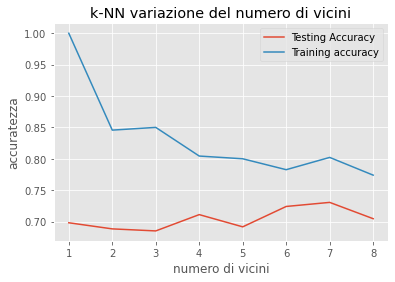

In [9]:
#Generate plot
plt.title('k-NN variazione del numero di vicini')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('numero di vicini')
plt.ylabel('accuratezza')
plt.show()

La massima accuratezza di ha per k=7

In [10]:

knn = KNeighborsClassifier(n_neighbors=7)

In [11]:

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [12]:
#accuratezza
knn.score(X_test,y_test)

0.7305194805194806

**Matrice di confusione**


In [13]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [14]:
#predizioni ottenute con il classificatore di cui sopra
y_pred = knn.predict(X_test)

In [15]:
confusion_matrix(y_test,y_pred)

array([[165,  36],
       [ 47,  60]], dtype=int64)

Dalla matrice di confusione di ottengono i seguenti dati:

True negative = 165 ->pazienti sani , classificati sani

False positive = 36 ->pazienti sani classificati malati

True postive = 60 -> pazienti malati classificati malati

Fasle negative = 47 ->pazienti malati classificati sani

matrice di confusione ottenuta con pandas

In [16]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,165,36,201
1,47,60,107
All,212,96,308


**Classification Report di Scikit-learn**



In [17]:
#import classification_report
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       201
           1       0.62      0.56      0.59       107

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.73      0.73      0.73       308



**ROC (Reciever Operating Charecteristic) curve**

Da una curva ROC è possibile notare:

1) tradeoff trasensibilità e specificità, un incremento della sensibilità è accompagnato da un decremento della specificità.

2) Più la curva segue il bordo superiore dello spazio ROC, più accurato è il test

3)Più la curva si avvicina alla diagonale di 45 gradi dello spazio ROC, meno preciso è il test.

4) L'area sotto la curva è un misura dell'accuratezza.

In [19]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [20]:
from sklearn.metrics import roc_curve

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

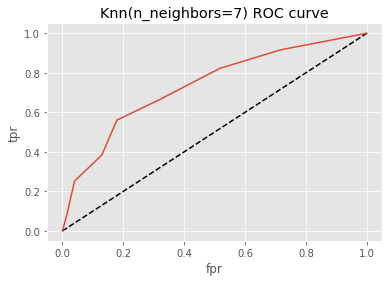

In [22]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [23]:
#area sotto la curca ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7345050448691124

**Cross Validation**
Le prestazioni del modello dipendono dal modo in cui i dati vengono suddivisi. Non sappiamo nulla della capacità di generalizzare del modello.
La cross validation viene utilizzata per ottenera una misura più accurata dell'efficacia del modello.
In particolare utiliizzando k fold cross validation il campione originale viene suddiviso in modo casuale in k sottocampioni di uguale dimensione. 
Di questi, un singolo sottocampione viene conservato come dati di convalida per testare il modello e i restanti k-1 sottocampioni vengono utilizzati come dati di addestramento. 
Il processo di cross validation viene quindi ripetuto k volte , con ciascuno dei k sottocampioni utilizzato esattamente una volta come dati di convalida. I k risultati delle pieghe possono quindi essere mediati (o altrimenti combinati) per produrre una singola stima.
Tutte le osservazioni vengono utilizzate sia per l'addestramento che per la convalida e ogni osservazione viene utilizzata per la convalida esattamente una volta.

**Scelta dell'iperparametro k**

Ci sono metodi più sofisticati per la scelta di k come iperparametro, rispetto a quello sopra utilizzato. 

Il modo migliore, consiste nel testare una serie di valori di k e scegliere quello che offre le 
prestazioni migliori selezionandoli attraverso la cross validation.

Questo può essere agevolmete fatto utilizzando Scikit-learn e quindi Grid Search cross-validation.



In [24]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [25]:
#nel caso di knn il parametro da regolare è n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [26]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [27]:
knn_cv.best_score_

0.7578558696205755

In [28]:
knn_cv.best_params_

{'n_neighbors': 14}

Il miglior parametro è k=14 con una precisione del 76%

--end--